# 1. Get all folder name and details.

In [330]:
import os 
cur_path=os.getcwd()
#print(cur_path)
Execl_path=f"{cur_path}\\..\\..\\Python_SelfProjects\\Database AutoCreation"
Excel_file_dir=os.listdir(path=Execl_path)
Excel_file_dir


['.gitkeep',
 'Income&Expenditure.db',
 'Income&Expenditure.xlsx',
 'IncomeExpenditure - Copy.ipynb',
 'IncomeExpenditure.ipynb']

In [331]:
Execl_path

'c:\\Users\\KIIT\\Desktop\\GitHUB\\CollegeProjects\\InHouse Projects\\ML-DL_SelfProjects\\ML Model Build Automation\\..\\..\\Python_SelfProjects\\Database AutoCreation'

# 2. Read excel and convert to csv

In [332]:
import pandas as pd
Excel_file_data=pd.read_excel(f"{Execl_path}\\Income&Expenditure.xlsx").iloc[:,1:]
Excel_file_data.head()

,Serial Number,Date,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
0,1,31-07-2023,Monday,Income,27700.0,Office,Online,27700.0,27700.0,206620.21
1,2,01-08-2023,Tuesday,Expenditure,720.9,Mobile Recharge,Online,26979.1,26979.1,205899.31
2,3,02-08-2023,Wednesday,None,0.0,None,None,26979.1,26979.1,205899.31
3,4,03-08-2023,Thursday,None,0.0,None,None,26979.1,26979.1,205899.31
4,5,04-08-2023,Friday,None,0.0,None,None,26979.1,26979.1,205899.31


In [333]:
Excel_file_data.to_csv("Income&Expenditure.csv")
IncExp_data=pd.read_csv("Income&Expenditure.csv").iloc[:,1:]
IncExp_data.head()

,Serial Number,Date,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
0,1,31-07-2023,Monday,Income,27700.0,Office,Online,27700.0,27700.0,206620.21
1,2,01-08-2023,Tuesday,Expenditure,720.9,Mobile Recharge,Online,26979.1,26979.1,205899.31
2,3,02-08-2023,Wednesday,None,0.0,None,None,26979.1,26979.1,205899.31
3,4,03-08-2023,Thursday,None,0.0,None,None,26979.1,26979.1,205899.31
4,5,04-08-2023,Friday,None,0.0,None,None,26979.1,26979.1,205899.31


# 3. Decalare ML Model 

In [334]:
Reg_model_flag=None
if len(IncExp_data.iloc[:,-1].unique())>2:
    print("Regression model to be applied")
    Reg_model_flag="regression"

elif len(IncExp_data.iloc[:,-1].unique())==2:
    print("Classification moddel to be applied")
    Reg_model_flag="classification"
    
else:
    pass

Regression model to be applied


In [335]:
#if Reg_model_flag=="regression":pass elif Reg_model_flag=="classification":pass else: pass

In [336]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor   
model_linearRegression=LinearRegression()
model_SVRegression=SVR()
model_DTRegression=DecisionTreeRegressor()
model_RFRegression=RandomForestRegressor()
model_regression={"Linear Regression":model_linearRegression,
                  "SVM Regression":model_SVRegression,
                  "DecisionTree Regression":model_DTRegression,
                  "Randomforest Regression":model_RFRegression}

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model_logsClassify=LogisticRegression()
model_SVClassify=SVC()
model_DTClassify=DecisionTreeClassifier()
model_RFClassify=RandomForestClassifier()
model_Classify={"Logistic Regression":model_logsClassify,
                "SVM Classification":model_SVClassify,
                "DecisionTree Classification":model_DTClassify,
                "Randomforest Classification":model_RFClassify}

In [337]:
for model_name,model in model_regression.items():
    print(model_name,end=" : ")
    print(model)
print()
for model_name,model in model_Classify.items():
    print(model_name,end=" : ")
    print(model)

Linear Regression : LinearRegression()
SVM Regression : SVR()
DecisionTree Regression : DecisionTreeRegressor()
Randomforest Regression : RandomForestRegressor()

Logistic Regression : LogisticRegression()
SVM Classification : SVC()
DecisionTree Classification : DecisionTreeClassifier()
Randomforest Classification : RandomForestClassifier()


# EDA(Explanatory Data Analysis)

In [338]:
IncExp_data.isnull().sum()

Serial Number        0
Date                 0
Day                  0
IncExp Status        0
Rupees               0
Pupose of IncExp     2
Payment mode         0
Monthly Saving       0
Cumulative Saving    0
Total Balance        0
dtype: int64

# Data Cleaning - Outliers, Null values

In [339]:
IncExp_data["Pupose of IncExp"].fillna(str(0),inplace=True)
IncExp_data.isnull().sum()

Serial Number        0
Date                 0
Day                  0
IncExp Status        0
Rupees               0
Pupose of IncExp     0
Payment mode         0
Monthly Saving       0
Cumulative Saving    0
Total Balance        0
dtype: int64

In [340]:
IncExp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial Number      269 non-null    int64  
 1   Date               269 non-null    object 
 2   Day                269 non-null    object 
 3   IncExp Status      269 non-null    object 
 4   Rupees             269 non-null    float64
 5   Pupose of IncExp   269 non-null    object 
 6   Payment mode       269 non-null    object 
 7   Monthly Saving     269 non-null    float64
 8   Cumulative Saving  269 non-null    float64
 9   Total Balance      269 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 21.1+ KB


# Feature Extraction 

In [341]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
obj_col=list(IncExp_data.columns[IncExp_data.dtypes=="object"])[1:]
print(obj_col)
for i in obj_col:
    IncExp_data[i]=le.fit_transform(IncExp_data[i])
IncExp_data

['Day', 'IncExp Status', 'Pupose of IncExp', 'Payment mode']


,Serial Number,Date,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
0,1,31-07-2023,1,1,27700.0,30,2,27700.0,27700.00,206620.21
1,2,01-08-2023,5,0,720.9,23,2,26979.1,26979.10,205899.31
2,3,02-08-2023,6,2,0.0,29,1,26979.1,26979.10,205899.31
3,4,03-08-2023,4,2,0.0,29,1,26979.1,26979.10,205899.31
4,5,04-08-2023,0,2,0.0,29,1,26979.1,26979.10,205899.31
...,...,...,...,...,...,...,...,...,...,...
264,255,31-01-2024,6,1,27700.0,30,2,27700.0,160080.37,339000.58
265,256,01-02-2024,4,2,0.0,29,1,27700.0,160080.37,339000.58
266,257,02-02-2024,0,2,0.0,29,1,27700.0,160080.37,339000.58
267,258,03-02-2024,2,0,8000.0,0,0,19700.0,152080.37,331000.58


In [342]:
IncExp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial Number      269 non-null    int64  
 1   Date               269 non-null    object 
 2   Day                269 non-null    int32  
 3   IncExp Status      269 non-null    int32  
 4   Rupees             269 non-null    float64
 5   Pupose of IncExp   269 non-null    int32  
 6   Payment mode       269 non-null    int32  
 7   Monthly Saving     269 non-null    float64
 8   Cumulative Saving  269 non-null    float64
 9   Total Balance      269 non-null    float64
dtypes: float64(4), int32(4), int64(1), object(1)
memory usage: 16.9+ KB


In [343]:
#IncExp_data["Date"] = pd.to_datetime(IncExp_data["Date"])
#Date=IncExp_data["Date"]
IncExp_data.set_index(IncExp_data["Date"])
#IncExp_data=IncExp_data.drop(columns="Date")
IncExp_data

,Serial Number,Date,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
0,1,31-07-2023,1,1,27700.0,30,2,27700.0,27700.00,206620.21
1,2,01-08-2023,5,0,720.9,23,2,26979.1,26979.10,205899.31
2,3,02-08-2023,6,2,0.0,29,1,26979.1,26979.10,205899.31
3,4,03-08-2023,4,2,0.0,29,1,26979.1,26979.10,205899.31
4,5,04-08-2023,0,2,0.0,29,1,26979.1,26979.10,205899.31
...,...,...,...,...,...,...,...,...,...,...
264,255,31-01-2024,6,1,27700.0,30,2,27700.0,160080.37,339000.58
265,256,01-02-2024,4,2,0.0,29,1,27700.0,160080.37,339000.58
266,257,02-02-2024,0,2,0.0,29,1,27700.0,160080.37,339000.58
267,258,03-02-2024,2,0,8000.0,0,0,19700.0,152080.37,331000.58


# Vis

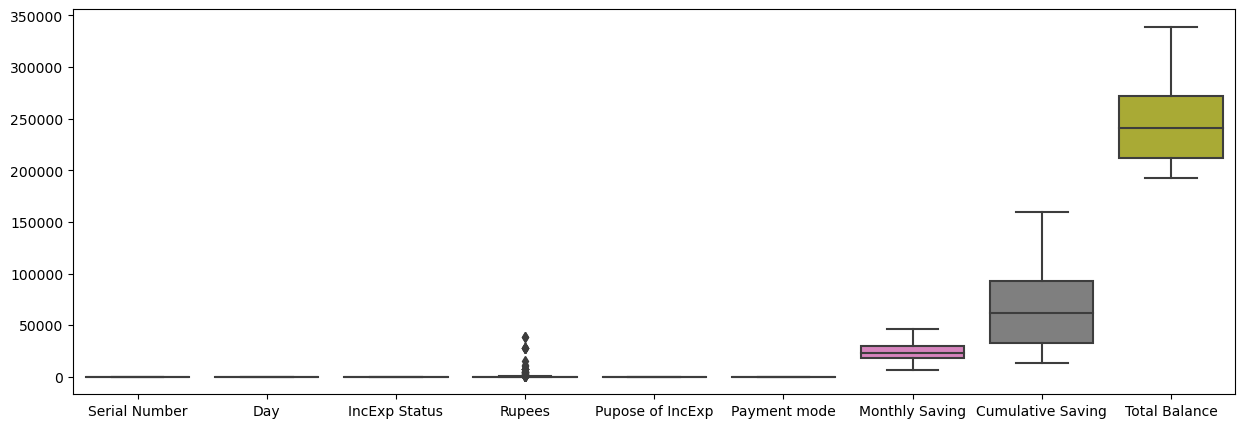

In [344]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[15,5])
sns.boxplot(IncExp_data)
plt.show()

In [345]:
IncExp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial Number      269 non-null    int64  
 1   Date               269 non-null    object 
 2   Day                269 non-null    int32  
 3   IncExp Status      269 non-null    int32  
 4   Rupees             269 non-null    float64
 5   Pupose of IncExp   269 non-null    int32  
 6   Payment mode       269 non-null    int32  
 7   Monthly Saving     269 non-null    float64
 8   Cumulative Saving  269 non-null    float64
 9   Total Balance      269 non-null    float64
dtypes: float64(4), int32(4), int64(1), object(1)
memory usage: 16.9+ KB


['Serial Number', 'Date', 'Day', 'IncExp Status', 'Rupees', 'Pupose of IncExp', 'Payment mode', 'Monthly Saving', 'Cumulative Saving', 'Total Balance']


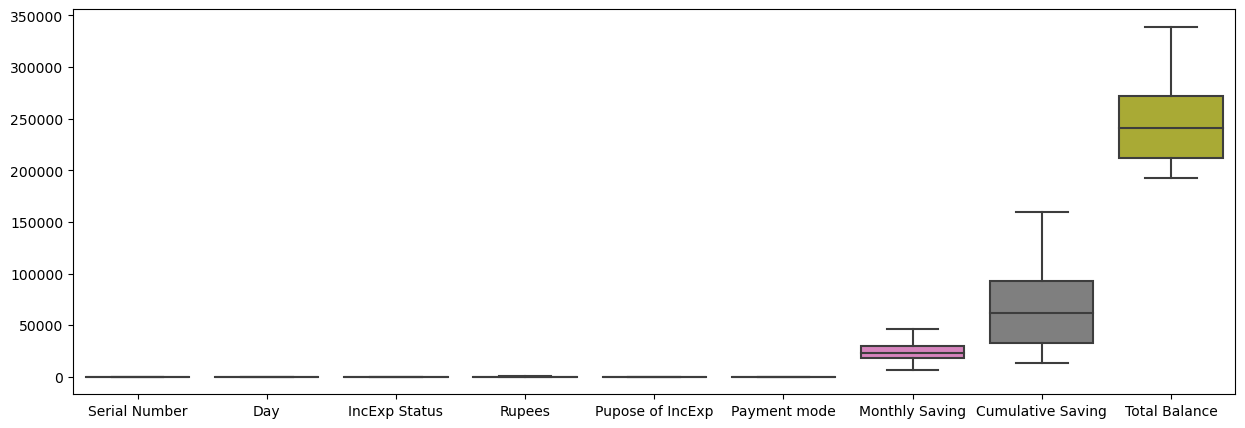

In [346]:
def outlier(i):
    q1=IncExp_data[i].quantile(0.25)
    q3=IncExp_data[i].quantile(0.75)
    IQR=q3-q1

    lb=q1-(IQR*1.5)
    ub=q3+(IQR*1.5)

    IncExp_data.loc[IncExp_data[i]<lb,i]=lb
    IncExp_data.loc[IncExp_data[i]>ub,i]=ub
print(list(IncExp_data.columns))
for i in list(IncExp_data.columns):
    if i!="Date":
        outlier(i)

plt.figure(figsize=[15,5])
sns.boxplot(IncExp_data)
plt.show()

# Model Building

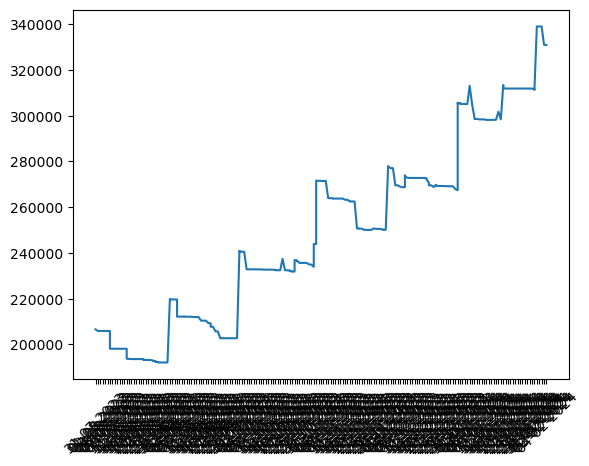

In [347]:
plt.plot(IncExp_data["Date"],IncExp_data.iloc[:,-1])
plt.xticks(rotation=45)
plt.show()